In [1]:
import warnings
warnings.filterwarnings('ignore')

### Loading data

In [2]:
from sklearn import datasets

housing_data, housing_target = datasets.load_boston(return_X_y=True)

print(housing_data.shape)
print(housing_target.shape)

(506, 13)
(506,)


### Splitting data into train and test batches

In [3]:
from sklearn.model_selection import train_test_split

housing_train_data, housing_test_data, \
housing_train_target, housing_test_target, = \
train_test_split(housing_data, housing_target, test_size=0.1, random_state=1010)

### Training LinearRegression as a benchmark

In [4]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression(normalize=True)

linear_regression.fit(housing_train_data, housing_train_target)

LinearRegression(normalize=True)

### Evaluating LinearRegression with mean squared error and variance score

In [5]:
from sklearn.metrics import mean_squared_error

print("Mean squared error of a linear moderl: %.2f" % 
      mean_squared_error(housing_test_target, linear_regression.predict(housing_test_data)))
print("Linear Regression variance score: %.2f" % 
    linear_regression.score(housing_test_data, housing_test_target))

Mean squared error of a linear moderl: 27.38
Linear Regression variance score: 0.78


### Generating polynomial features

In [6]:
from sklearn.preprocessing import PolynomialFeatures

poly_feat = PolynomialFeatures(2, )

housing_train_poly_data = poly_feat.fit_transform(housing_train_data)
print(housing_train_poly_data.shape)

housing_test_poly_data = poly_feat.fit_transform(housing_test_data)
print(housing_test_poly_data.shape)

(455, 105)
(51, 105)


### Training LinearRegression with generated polynomial features

In [7]:
poly_linear_regression = LinearRegression(normalize=True)
poly_linear_regression.fit(housing_train_poly_data, housing_train_target)

LinearRegression(normalize=True)

### Evaluating LinearRegression with polynomial features using mean squared error and variance score

In [8]:
print("Mean squared error of a linear model using polynomial features: %.2f" % 
      mean_squared_error(housing_test_target, poly_linear_regression.predict(housing_test_poly_data)))
print("Linear Regression variance score using polynomial features: %.2f" % 
      poly_linear_regression.score(housing_test_poly_data, housing_test_target))

Mean squared error of a linear model using polynomial features: 16.37
Linear Regression variance score using polynomial features: 0.87


In [9]:
print(poly_linear_regression.coef_)

[ 1.16059880e-09 -4.74148732e-01 -3.15553193e-01 -5.37326030e+00
  4.25841986e+01  3.53059486e+01  1.03510808e+01  9.50292318e-01
 -7.16138496e+00  2.64220906e+00  4.06147473e-03  2.71772779e-01
  2.32889098e-03 -1.20249433e-01  3.10831955e-04  1.77046336e-01
  3.27921405e-01  2.17683478e+00 -1.91246029e+00  2.68869862e-01
 -6.53969582e-03 -1.15723006e-01  2.70113149e-01 -2.50143894e-02
  2.21354974e-01 -6.72914821e-04  3.29093386e-02 -1.01792014e-03
 -7.94703224e-03 -9.47848164e-02 -9.50066355e-01  3.30083299e-02
 -3.56753029e-04 -5.37367883e-03 -9.61885569e-04  6.38045674e-04
 -5.59541953e-03  1.50663627e-03 -1.89640538e-03  4.01106789e-02
 -6.91141135e-02  5.32165763e-01  2.72780977e-01  3.83194662e-03
  1.40056422e-01 -9.34806439e-03  1.89832052e-04 -8.73073846e-03
  5.35438997e-03 -1.11924864e-02  4.25841986e+01 -5.66072903e+01
 -5.87775113e+00  2.49522723e-03  6.13822365e-01 -5.88150687e-01
  4.92951161e-02 -1.66752139e+00  5.54928613e-03 -2.25489007e-01
 -9.94127154e-01  1.56571

### Exercise 1
ToDo: plot how quality of solution (mean and score) change with change in polynomial features. Plot mean and score for 5 different values of polynominal degree

In [10]:
degrees = [1,2,3,4,5,6]

array_mean_squared_errors = []
array_variance_scores = []

In [11]:
for degree in degrees:
    poly_feat_ex = PolynomialFeatures(degree, )
    train_data = poly_feat_ex.fit_transform(housing_train_data)
    test_data = poly_feat_ex.fit_transform(housing_test_data)
    poly_linear_regression.fit(train_data, housing_train_target)
    array_mean_squared_errors.append(mean_squared_error(housing_test_target, poly_linear_regression.predict(test_data)))
    array_variance_scores.append(poly_linear_regression.score(test_data, housing_test_target))

print(array_mean_squared_errors)
print(array_variance_scores)

[27.377664753228586, 16.37406749937476, 729050.4244805713, 1916.329150659751, 1335.9391569830193, 1361.5681793020888]
[0.7814798349948079, 0.8693071902216359, -5818.057998210474, -14.29555445948126, -9.663058652086093, -9.867621686828652]


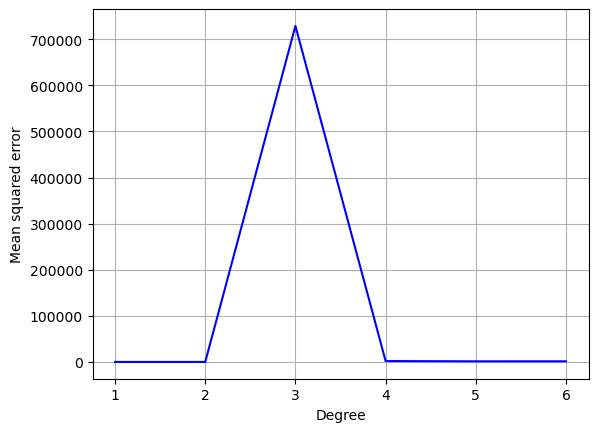

In [12]:
import numpy as np
import matplotlib.pyplot as plt

mean_x = np.array(degrees)
mean_y = np.array(array_mean_squared_errors)

plt.plot(mean_x, mean_y, color="blue")
plt.grid()
plt.xlabel("Degree")
plt.ylabel("Mean squared error")
plt.show()

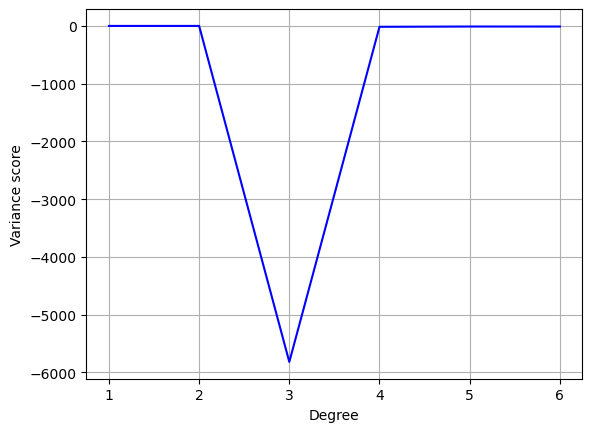

In [13]:
variance_x = np.array(degrees)
variance_y = np.array(array_variance_scores)

plt.plot(variance_x, variance_y, color="blue")
plt.xlabel("Degree")
plt.ylabel("Variance score")
plt.grid()
plt.show()

### Ranking features with RFE

In [14]:
from sklearn.feature_selection import RFE

rfe = RFE(estimator=LinearRegression(normalize=False), n_features_to_select=45)
rfe.fit(housing_train_poly_data, housing_train_target)

print(rfe.support_)
print(rfe.ranking_)

[False  True  True  True  True  True  True  True  True  True False  True
 False  True False  True  True  True  True  True False False False False
  True False False False False  True  True False False False False False
 False False False False  True  True False False  True  True False False
 False False  True  True  True False  True  True  True  True False  True
  True  True False  True  True False  True False  True  True False  True
  True False  True False  True False False False False False False False
  True  True False False False  True False False False False False False
 False False False False False False False False False]
[61  1  1  1  1  1  1  1  1  1 17  1 30  1 47  1  1  1  1  1 35  7 10 11
  1 45  6 46 37  1  1  8 41 36 54 49 38 44 32 12  1  1  4 50  1  1 51 26
 39 14  1  1  1 28  1  1  1  1 16  1  1  1 15  1  1  3  1 23  1  1 27  1
  1 21  1 31  1 56 52 19 53 34 43 29  1  1 48 18 24  1  2 25  9 40  5 58
 33 57 59 20 42 22 60 55 13]


### Evaluating linear model using _selected_ polynomial features

In [15]:
print("Mean squared error of a linear model using polynomial features: %.2f" % 
      mean_squared_error(housing_test_target, rfe.predict(housing_test_poly_data)))
print("Linear Regression variance score using polynomial features: %.2f" % 
      rfe.score(housing_test_poly_data, housing_test_target))

Mean squared error of a linear model using polynomial features: 12.52
Linear Regression variance score using polynomial features: 0.90


### Exercise 2
ToDo: plot how quality of solution (mean and score) change with change in number of polynomial features selected using recursive feature elimination. Generate a polynominal features with the degree of 3 and check quality of solution 
(by polotting for mean and r2_score) for [5,10,15,20,25,30,35,40,45,50,55, 60] features

In [16]:
poly_feat_ex = PolynomialFeatures(3, )
ex_train_data = poly_feat_ex.fit_transform(housing_train_data)
ex_test_data = poly_feat_ex.fit_transform(housing_test_data)

In [17]:
feature_number = [5,10,15,20,25,30,35,40,45,50,55,60]

mean_rfe_err = []
variance_rfe_score = []

In [18]:
for feature in feature_number:
    ex_rfe = RFE(estimator=LinearRegression(normalize=False), n_features_to_select=feature)
    ex_rfe.fit(ex_train_data, housing_train_target)
    mean_rfe_err.append(mean_squared_error(housing_test_target, ex_rfe.predict(ex_test_data)))
    variance_rfe_score.append(ex_rfe.score(ex_test_data, housing_test_target))

print(mean_rfe_err)
print(variance_rfe_score)

[47.511303429132546, 28.00965518672275, 22.88927507851008, 11.716220788014828, 11.832000428219954, 9.551672507811272, 8.538084714401236, 8.274327103974299, 8.085033153077152, 7.822189532809283, 7.917311187828486, 7.793124465143251]
[0.6207792754229906, 0.7764354802240979, 0.8173047916215934, 0.9064847012003703, 0.9055605834456271, 0.9237614650009062, 0.9318516134434277, 0.9339568461968922, 0.9354677327446447, 0.9375656703075891, 0.9368064382862418, 0.9377976588076864]


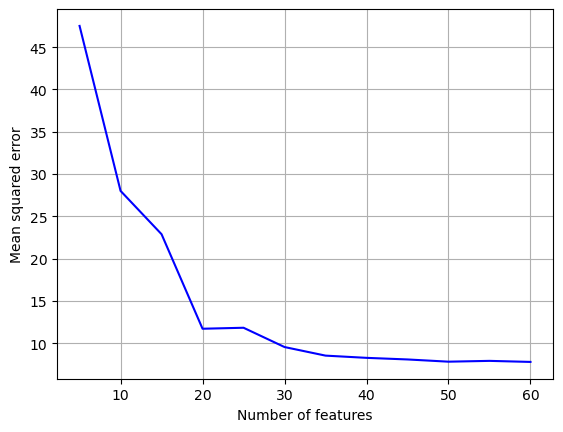

In [19]:
rfe_mean_x = np.array(feature_number)
rfe_mean_y = np.array(mean_rfe_err)

plt.plot(rfe_mean_x, rfe_mean_y, color="blue")
plt.grid()
plt.xlabel("Number of features")
plt.ylabel("Mean squared error")
plt.show()

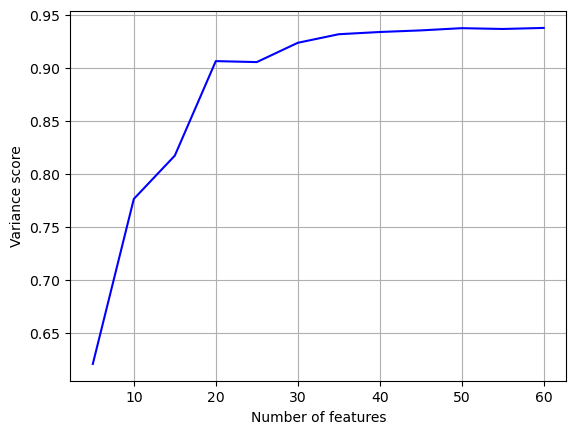

In [20]:
rfe_variance_x = np.array(feature_number)
rfe_variance_y = np.array(variance_rfe_score)

plt.plot(rfe_variance_x, rfe_variance_y, color="blue")
plt.xlabel("Number of features")
plt.ylabel("Variance score")
plt.grid()
plt.show()